[<matplotlib.text.Text at 0x10c8c5f50>, <matplotlib.text.Text at 0x10c4ef450>]

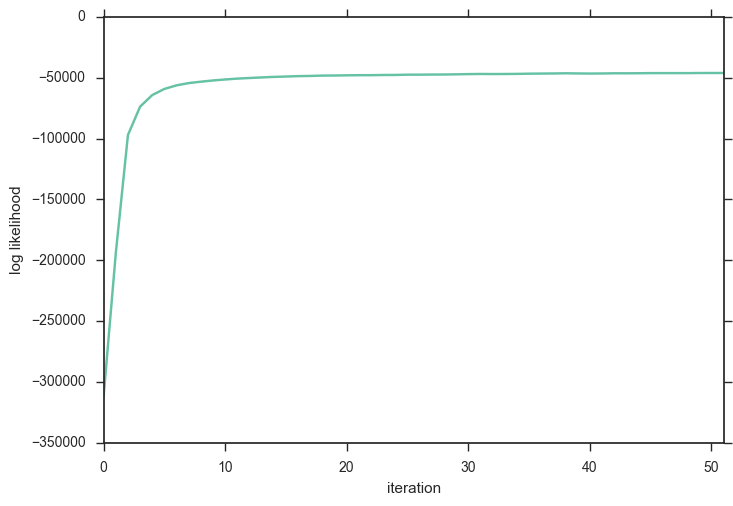

In [175]:
%matplotlib inline
import pandas as pd
trace = pd.read_csv("sampler.log", delimiter="\t", header=None)
trace.columns = ["time", "iter", "ll"]
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
ax = sns.tsplot(trace["ll"])
ax.set(xlabel='iteration', ylabel='log likelihood')

In [238]:
'''
    model_position_df:
        index: irrelevent
        columns:
            legislator: model index of legislator
            vote: model index of vote
            position: 1 if yes, 0 if no

    model_legislator_index:
        index: model index of legislator
        value: index of legislator in legislator_df

    model_vote_index:
        index: model index of vote
        value: index of vote in vote_df
'''
            
model_legislator_index = pd.read_csv("model_legislator_index.df")
model_legislator_index.columns=["legislator", "legislator_df_ix"]
model_vote_index = pd.read_csv("model_vote_index.df")
model_vote_index.columns=["vote", "vote_df_ix"]
legislator_df = pd.read_csv("legislator_df.df")
position_df = pd.read_csv("position_df.df")
vote_df = pd.read_csv("vote_df.df")

In [251]:
'''load up gibbs trace, link to legislator_df and vaidate'''

import glob
import numpy as np
BURNIN = 30
files = glob.glob("trace/leg_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei["iter"] = iter_
            yield tracei

leg_traces = pd.concat(get_trace())
groupby_object = leg_traces.groupby(['legislator'])
leg_means = groupby_object.aggregate(np.mean)

leg_means = leg_means.sort(["theta"], ascending=False)

#print leg_means.head()

def check(ln):
    # 2x checking pandas....
    rr = pd.concat(get_trace())
    rr = rr.query("legislator=={}".format(ln))
    print rr["theta"].mean()

# leg_means['legislator'] = leg_means.index
leg_means.reset_index(inplace=True)
leg_means = leg_means[["legislator", "theta"]]
legislator_df['legislator_df_ix'] = legislator_df.index
legislator_df.head()
leg_means.merge(model_legislator_index, on ="legislator").merge(legislator_df, on="legislator_df_ix")


/Library/Python/2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,legislator,theta,legislator_df_ix,Unnamed: 0,last_name,first_name,birthday,gender,type,state,...,thomas_id,opensecrets_id,lis_id,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,527,1.816622,12267,12267,Lautenberg,Frank,1924-01-23,M,sen,NJ,...,1381.0,N00000659,S166,2515.0,300064,53324.0,NaN,NaN,14914.0,Frank Lautenberg
1,212,1.642203,212,212,Lewis,John,1940-02-21,M,rep,GA,...,688.0,N00002577,NaN,2528.0,400240,26820.0,John Lewis (Georgia),NaN,15431.0,John Lewis (Georgia politician)
2,456,1.616826,457,457,Pocan,Mark,1964-08-14,M,rep,WI,...,2171.0,N00033549,NaN,79688.0,412585,26238.0,Mark Pocan,NaN,21370.0,Mark Pocan
3,311,1.610803,312,312,Schakowsky,Janice,1944-05-26,F,rep,IL,...,1588.0,N00004724,NaN,57874.0,400360,6387.0,Jan Schakowsky,NaN,29911.0,Jan Schakowsky
4,83,1.610569,83,83,Clarke,Yvette,1964-11-21,F,rep,NY,...,1864.0,N00026961,NaN,1022875.0,412221,44741.0,Yvette D. Clarke,NaN,20733.0,Yvette Clarke
5,364,1.601808,365,365,Wilson,Frederica,1942-11-05,F,rep,FL,...,2004.0,N00030650,NaN,87016.0,412412,17319.0,Frederica Wilson,NaN,21118.0,Frederica Wilson
6,209,1.598359,209,209,Lee,Barbara,1946-07-16,F,rep,CA,...,1501.0,N00008046,NaN,54579.0,400237,8315.0,NaN,NaN,29778.0,Barbara Lee
7,398,1.592946,399,399,Lowenthal,Alan,1941-03-08,M,rep,CA,...,2111.0,N00033274,NaN,93815.0,412521,16469.0,Alan Lowenthal,NaN,21313.0,Alan Lowenthal
8,120,1.588946,120,120,Edwards,Donna,1958-06-28,F,rep,MD,...,1894.0,N00028249,NaN,38535.0,412263,65085.0,NaN,NaN,20763.0,Donna Edwards
9,46,1.572561,46,46,Becerra,Xavier,1958-01-26,M,rep,CA,...,70.0,N00009774,NaN,26567.0,400021,26754.0,Xavier Becerra,NaN,29316.0,Xavier Becerra


In [249]:
import glob
BURNIN = 30
files = glob.glob("trace/votes_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei.columns=["ix", "vote", "alpha", "beta"]
            tracei["iter"] = iter_
            yield tracei

votes_trace = pd.concat(get_trace())
votes_trace_groupby_object = votes_trace.groupby(['vote'])
vote_means = votes_trace_groupby_object.aggregate(np.mean)
vote_means.reset_index(inplace=True)
vote_means.head()
vote_df['vote_df_ix'] = vote_df.index
votes_merged = model_vote_index.merge(vote_means, on="vote").merge(vote_df, on="vote_df_ix")
votes_merged.sort("beta")

/Library/Python/2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,vote,vote_df_ix,ix,alpha,beta,Unnamed: 0,amendment_author,amendment_number,amendment_purpose,amendment_type,...,record_modified,requires,result,result_text,session,source_url,subject,type,updated_at,vote_id
766,767,914,767,-0.052839,-3.172121,914,NaN,526.0,To establish a deficit-neutral reserve fund to...,s,...,2013-03-23T03:41:00-04:00,1/2,Amendment Rejected,Amendment Rejected (44-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Vitter Amdt. No. 526,On the Amendment,2014-06-18T11:22:43-04:00,s83-113.2013
730,731,878,731,0.145142,-3.159657,878,NaN,158.0,To prohibit the consideration of a budget reso...,s,...,2013-03-22T11:37:00-04:00,1/2,Amendment Rejected,Amendment Rejected (45-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Ayotte Amdt. No. 158,On the Amendment,2014-06-18T11:22:44-04:00,s50-113.2013
828,829,980,829,0.191498,-3.069775,980,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll142.xml,"Providing for consideration of H.R. 1459, the ...",On Ordering the Previous Question,2014-06-18T11:23:29-04:00,h142-113.2014
512,513,539,513,0.191563,-3.040454,539,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll585.xml,Keep Your Health Plan Act of 2013,On Motion to Table the Appeal of the Ruling of...,2014-06-18T11:20:52-04:00,h585-113.2013
748,749,896,749,-0.216166,-3.039177,896,NaN,307.0,To establish a deficit-neutral reserve fund to...,s,...,2013-03-22T21:25:00-04:00,1/2,Amendment Rejected,Amendment Rejected (46-53),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Thune Amdt. No. 307,On the Amendment,2014-06-18T11:22:43-04:00,s67-113.2013
733,734,881,734,0.259124,-3.027198,881,NaN,222.0,To establish a deficit neutral reserve fund to...,s,...,2013-03-22T12:27:00-04:00,1/2,Amendment Rejected,Amendment Rejected (45-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Crapo Amdt. No. 222,On the Amendment,2014-06-18T11:22:44-04:00,s53-113.2013
1042,1043,1201,1043,0.255976,-3.014213,1201,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll342.xml,"Providing for consideration of H.R. 6, the Dom...",On the Resolution,2014-06-27T13:15:25-04:00,h342-113.2014
1179,1180,1338,1180,-0.079283,-2.985000,1338,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll466.xml,"Providing for consideration of H.Res. 676, pro...",On the Resolution,2014-08-02T15:58:46-04:00,h466-113.2014
437,438,462,438,0.329804,-2.979780,462,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll515.xml,Pay Our Guard and Reserve Act,Table Appeal of the Ruling of the Chair,2014-06-18T11:21:04-04:00,h515-113.2013
450,451,475,451,-0.040741,-2.959128,475,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll527.xml,Making continuing appropriations for the Food ...,Table Appeal of the Ruling of the Chair,2014-06-18T11:21:02-04:00,h527-113.2013


In [250]:
print leg_means.head()
leg_means.columns
# print model_legislator_index.head()

   legislator     theta
0         527  1.816622
1         212  1.642203
2         456  1.616826
3         311  1.610803
4          83  1.610569


Index([u'legislator', u'theta'], dtype='object')

In [179]:
model_vote_index.columns = ["ix", "real"] # assuming 1st column is index and second is real
votes = model_vote_index.merge(vote_means, on="ix")
tmp = [o for o in vote_df.columns]
tmp[0] = "ix"
vote_df.columns = tmp
votes = votes.merge(vote_df, on="ix")
votes.sort(["alpha"])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ix,real,alpha,beta,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,...,record_modified,requires,result,result_text,session,source_url,subject,type,updated_at,vote_id
857,858,1012,-2.691081,0.022561,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-03-07T15:59:00-05:00,1/2,Nomination Confirmed,Nomination Confirmed (63-34),2013,http://www.senate.gov/legislative/LIS/roll_cal...,"Confirmation John Owen Brennan, of Virginia, t...",On the Nomination,2014-06-18T11:22:44-04:00,s32-113.2013
592,593,626,-2.500057,-2.356487,NaN,NaN,NaN,NaN,113.0,2319.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll633.xml,To clarify certain provisions of the Native Am...,"On Motion to Suspend the Rules and Pass, as Am...",2014-06-18T11:20:46-04:00,h633-113.2013
750,751,898,-2.022801,-1.556171,NaN,NaN,NaN,NaN,113.0,1243.0,...,2013-08-01T18:23:00-04:00,3/5,Cloture Motion Rejected,"Cloture Motion Rejected (54-43, 3/5 majority r...",2013,http://www.senate.gov/legislative/LIS/roll_cal...,Motion to Invoke Cloture on S. 1243,On the Cloture Motion,2014-06-18T11:22:30-04:00,s199-113.2013
631,632,677,-1.852329,1.798887,NaN,NaN,NaN,NaN,113.0,1033.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll091.xml,To authorize the acquisition and protection of...,On Motion to Suspend the Rules and Pass,2014-06-18T11:22:06-04:00,h91-113.2013
591,592,625,-1.806143,1.461481,NaN,NaN,NaN,NaN,113.0,2019.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll632.xml,Gabriella Miller Kids First Research Act,"On Motion to Suspend the Rules and Pass, as Am...",2014-06-18T11:20:47-04:00,h632-113.2013
861,862,1016,-1.795600,-1.998676,NaN,53.0,Of a perfecting nature.,s,113.0,933.0,...,2013-03-14T12:07:00-04:00,3/5,Amendment Rejected,"Amendment Rejected (54-45, 3/5 majority required)",2013,http://www.senate.gov/legislative/LIS/roll_cal...,Harkin Amdt. No. 53,On the Amendment,2014-06-18T11:22:44-04:00,s36-113.2013
972,973,1130,-1.781621,-1.999498,NaN,NaN,NaN,NaN,113.0,3060.0,...,NaN,2/3,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll136.xml,Sergeant William Moody Post Office Building in...,On Motion to Suspend the Rules and Pass,2014-06-18T11:23:30-04:00,h136-113.2014
673,674,735,-1.777592,2.121467,NaN,919.0,To allow Indian tribes to participate in certa...,s,113.0,954.0,...,2013-05-21T12:41:00-04:00,1/2,Amendment Agreed to,Amendment Agreed to (87-8),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Cantwell Amdt. No. 919,On the Amendment,2014-06-18T11:22:35-04:00,s129-113.2013
135,136,146,-1.772641,1.121480,NaN,NaN,NaN,NaN,113.0,260.0,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll221.xml,Providing for further consideration of the bil...,On the Resolution,2014-06-18T11:21:52-04:00,h221-113.2013
934,935,1092,-1.733957,-1.892114,Smith of Texas Amendment No. 1,1.0,NaN,h-bill,113.0,3826.0,...,NaN,1/2,Agreed to,Agreed to,2014,http://clerk.house.gov/evs/2014/roll101.xml,NaN,On the Amendment,2014-06-18T11:23:34-04:00,h101-113.2014
